# **Dry Beans Classification**
- Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both marketing and production to provide the principles of sustainable agricultural systems.

- In this notbook we try different algorithms to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira, depending ONLY on dimension and shape features of bean varieties with no external discriminatory features.

#### **Required Packages**

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import warnings

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

#### **Data fields**
- **ID**: An ID for this instance
- **Area (A)**: The area of a bean zone and the number of pixels within its boundaries.
- **Perimeter (P)**: Bean circumference is defined as the length of its border.
- **MajorAxisLength (L)**: The distance between the ends of the longest line that can be drawn from a bean.
- **MinorAxisLength (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- **AspectRatio (K)**: Defines the relationship between L and l.
- **Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.
- **ConvexArea (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- **EquivDiameter (Ed)**: The diameter of a circle having the same area as a bean seed area.
- **Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.
- **Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- **Roundness (R)**: Calculated with the following formula: (4 pi A)/(P^2)
- **Compactness (CO)**: Measures the roundness of an object: Ed/L
- **ShapeFactor1 (SF1)**: L/d
- **ShapeFactor2 (SF2)**: l/d
- **ShapeFactor3 (SF3)**: 4A/(L^2 * pi)
- **ShapeFactor4 (SF4)**: 4A/(L l pi)
- **y**: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

#### **Read Data**

In [195]:
data = pd.read_csv("dataset/train_data.csv", index_col='ID')

In [196]:
data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


## **EDA**

#### 1. Data shape

In [197]:
print("Data Shape: ", data.shape)

Data Shape:  (10834, 17)


In [198]:
print("Data Columns: ", list(data.columns))

Data Columns:  ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'y']


#### 2. Get Data Summary and Information

In [199]:
data.describe().T['mean', 'std', 'min', 'max']

,count,mean,std,min,25%,50%,75%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.994677


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

#### 3. Split data into features and labels

In [202]:
y = data['y']
X = data.drop('y', axis=1)

#### 4. Data Visualization

* ##### Distribution

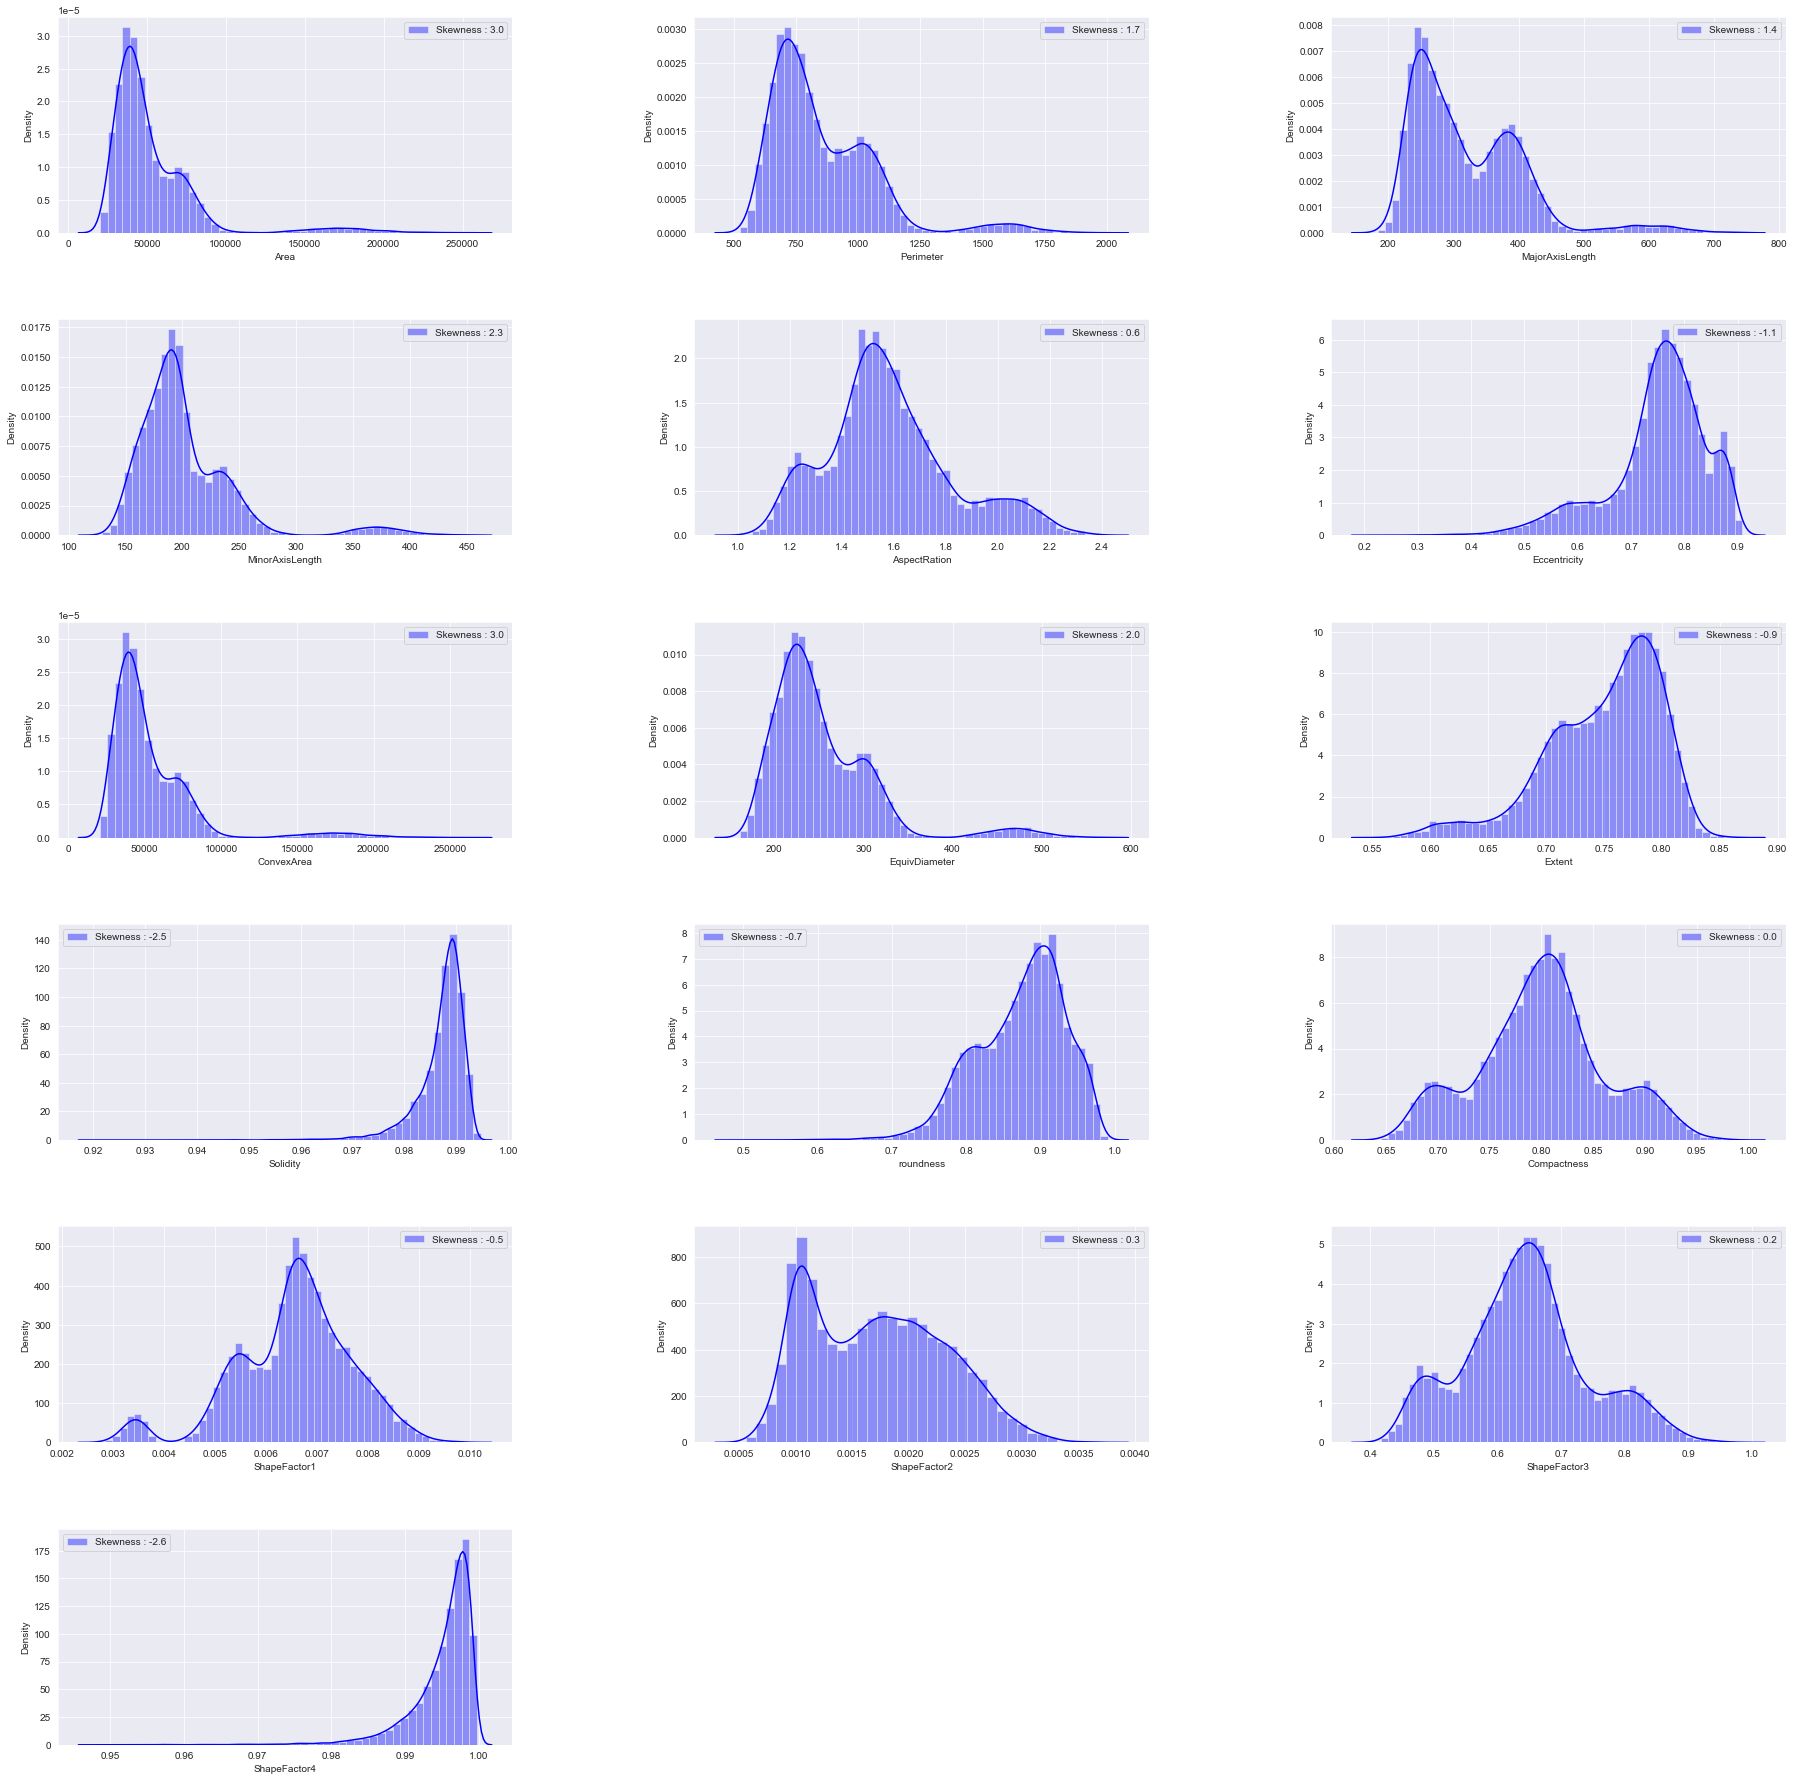

In [203]:
f, axs = plt.subplots(figsize=(30, 30))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, column in enumerate(X.columns, 1):
    _ = plt.subplot(6, 3, i)
    _ = sns.distplot(X[column], color="b", label="Skewness : %.1f"%(X[column].skew()))
    plt.legend(loc="best")
plt.show()

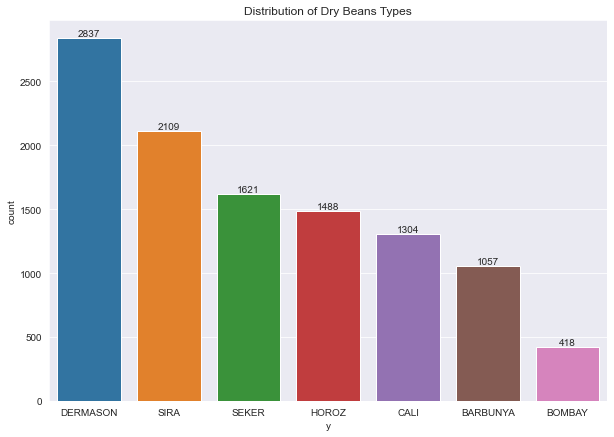

In [204]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of Dry Beans Types')
ax = sns.countplot(x=y, order=y.value_counts(ascending=False).index)

for p in ax.patches:
    x_ = p.get_bbox().get_points()[:,0]
    y_ = p.get_bbox().get_points()[1,1]
    ax.annotate(p.get_height(), (x_.mean(), y_), ha='center', va='bottom')

plt.show()

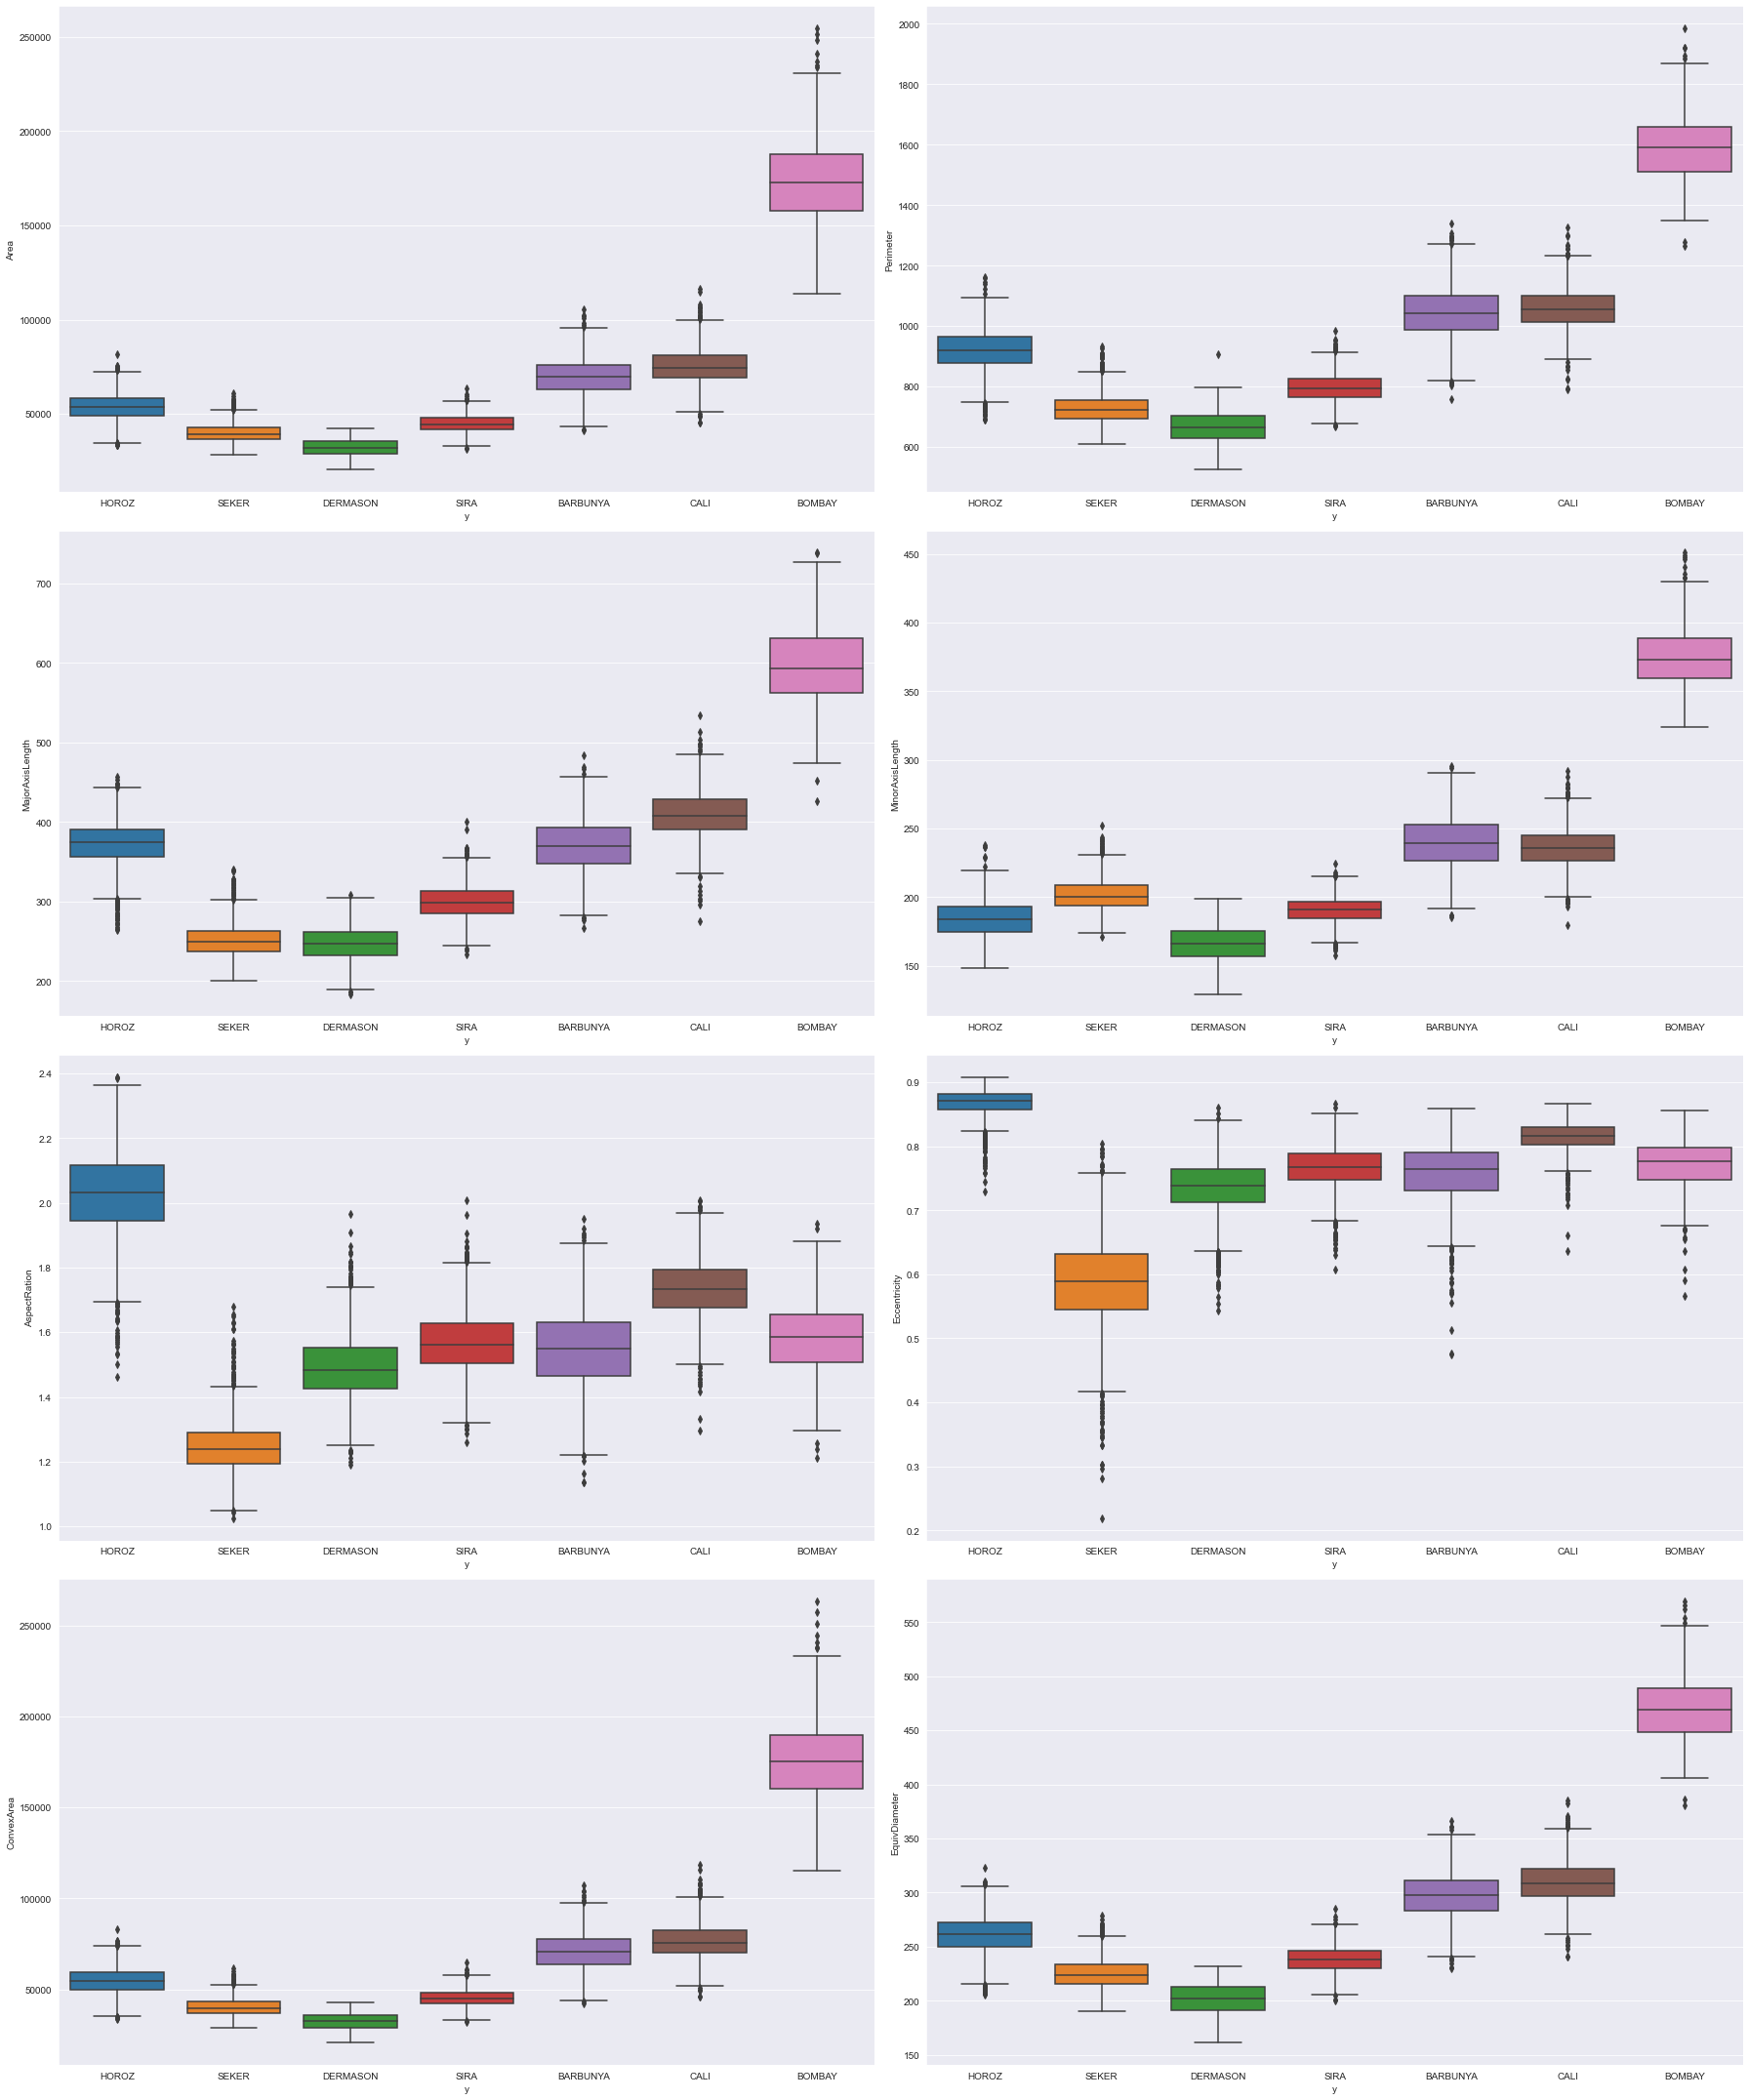

In [205]:
fig, ax = plt.subplots(4, 2, figsize=(25, 30))

for variable, subplot in zip(X.columns, ax.flatten()):
    sns.boxplot(x=y, y=X[variable], ax=subplot)
plt.tight_layout()

    4- Check Data outliers using boxplot

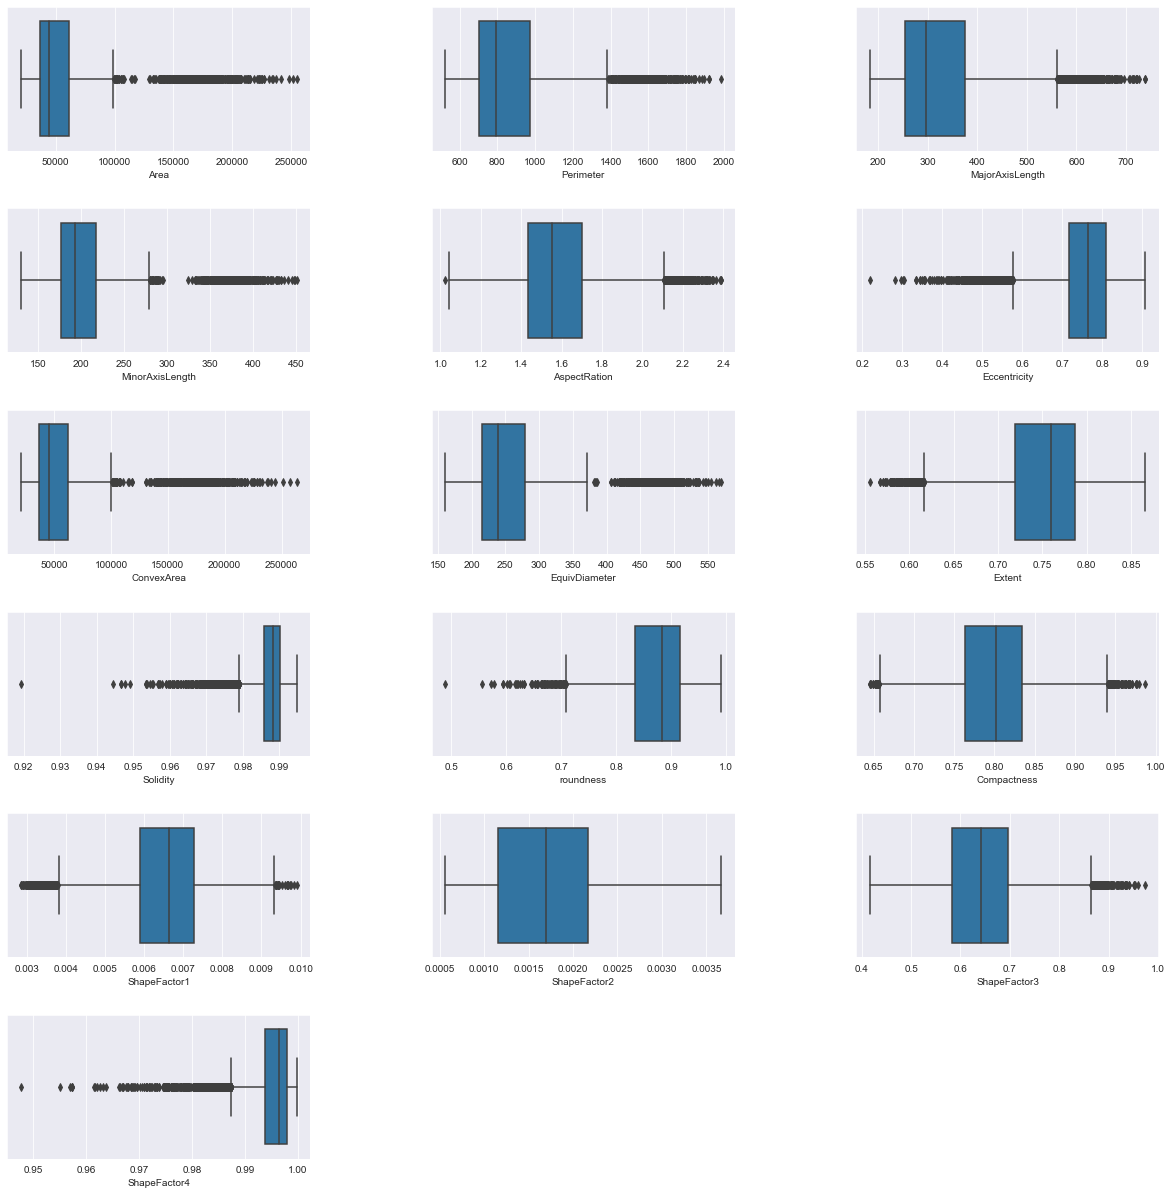

In [206]:
f, axs = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, column in enumerate(X.columns, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(data[column])

In [207]:
scaler = QuantileTransformer(output_distribution='normal', random_state=0)
df = scaler.fit_transform(X)
X = pd.DataFrame(df, columns = X.columns, index = X.index)

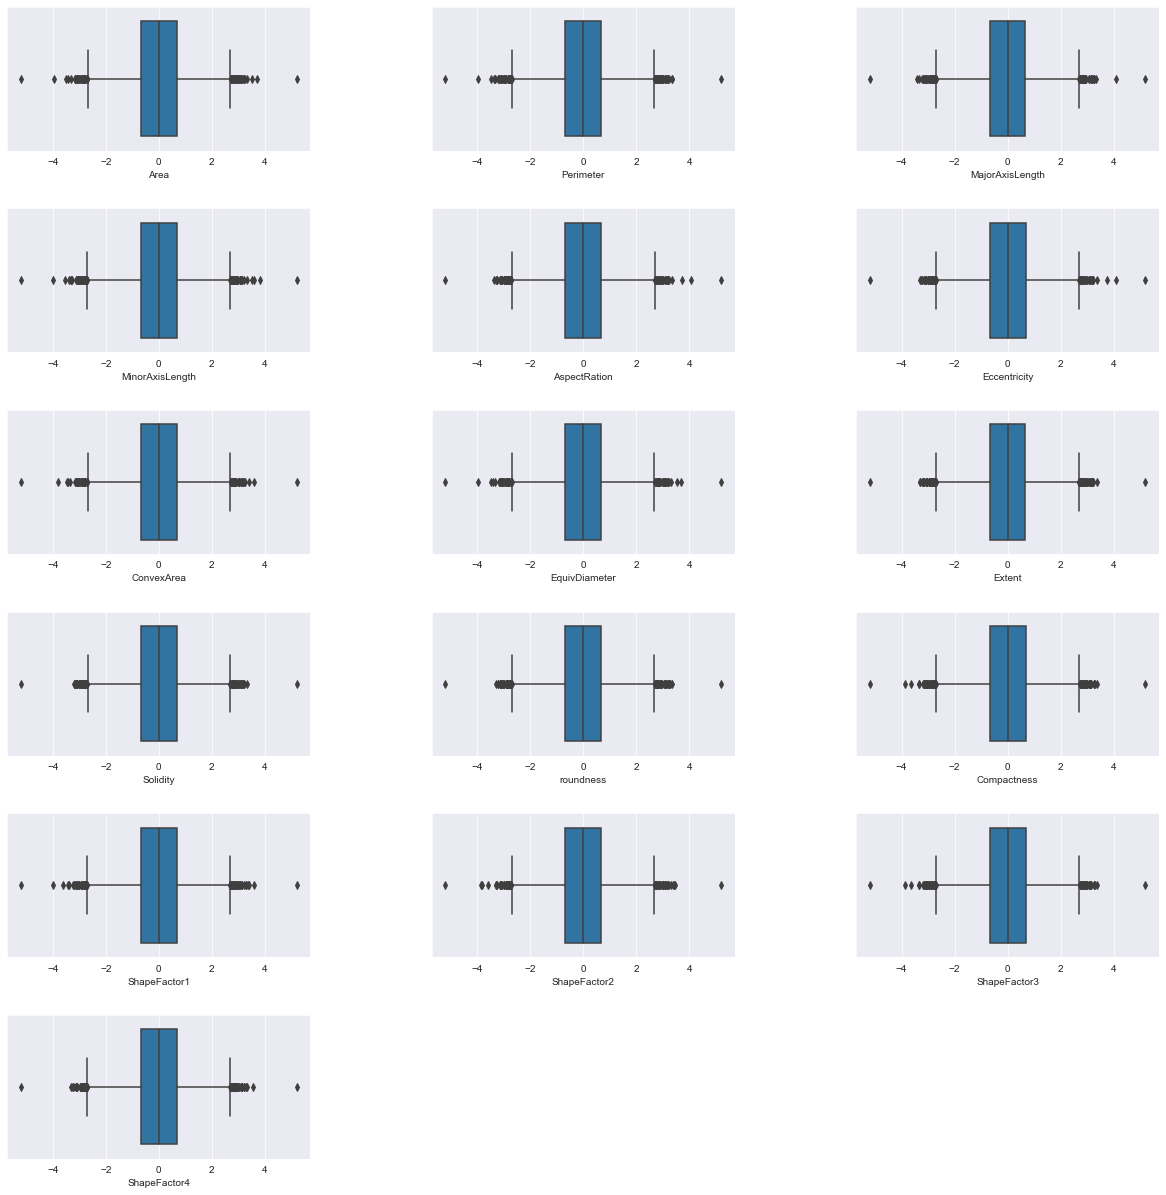

In [208]:
f, axs = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, column in enumerate(X.columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(X[column])

    5- Split Data into train and validation

In [209]:
# split into train validation sets
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.80, random_state=16, stratify=Y)